In [5]:
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt
% matplotlib inline

Height of Template: 35 & Width of Template: 24


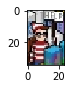

In [6]:
# Insert the location of the images
puzzle_location = 'C:/Users/jenil/OneDrive - University of Texas at Arlington/computer vision project/Images/Convention.jpg'
waldo_location = 'C:/Users/jenil/OneDrive - University of Texas at Arlington/computer vision project/Images/Wally.png'

# load the puzzle and waldo images
puzzle = cv2.imread(puzzle_location)
waldo = cv2.imread(waldo_location)
(waldo_height, waldo_width) = waldo.shape[:2]

# Display the dimensions and plot the image of Waldo
print("Height of Template: %d & Width of Template: %d" %(waldo_height, waldo_width))

# cv2 reads the image in BGR, we need to convert it to RGB values to see the plot. 
# What happens if you do not convert?
# Go ahead and try it out. Comment the next line and run the cell.
waldo_rgb = cv2.cvtColor(waldo,cv2.COLOR_RGB2BGR)

plt.figure(figsize=(1,1))
plt.imshow(waldo_rgb)

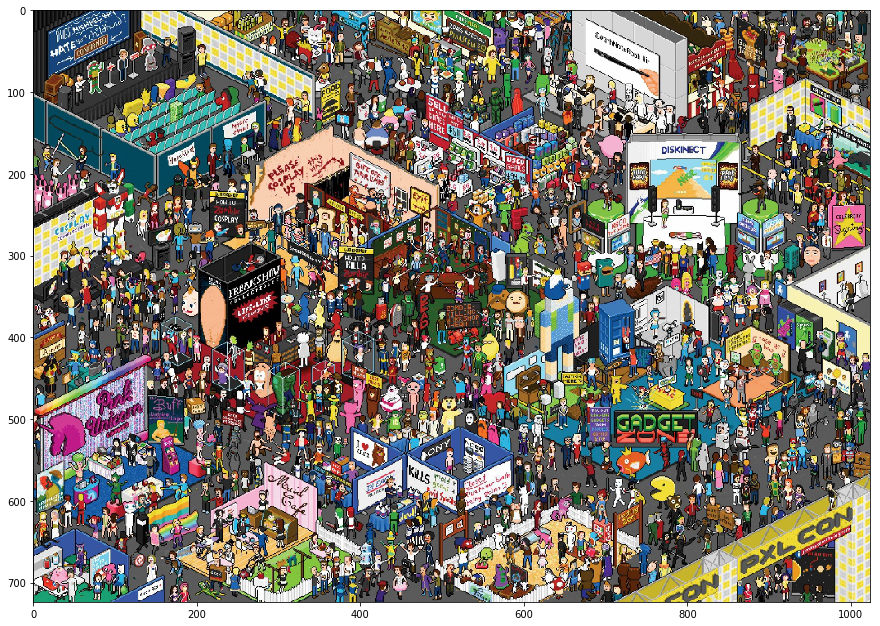

In [7]:
# convert color from rgb to bgr
puzzle = cv2.cvtColor(puzzle,cv2.COLOR_RGB2BGR)
plt.figure(figsize=(15,15))
plt.imshow(puzzle)

In [13]:
# there are 3 methods to find images.
method = cv2.TM_CCOEFF
# match template will move from left to right, top to botton with waldo image and find it in puzzle.
target_image = cv2.matchTemplate(puzzle, waldo, method)
# min max loc will return the (x,y) location form x and y.
(_, _, minLoc, maxLoc) = cv2.minMaxLoc(target_image)
top_left = maxLoc
# using left location we can find bottom right location of the image.
bottom_right = (top_left[0] + waldo_width, top_left[1] + waldo_height)
waldo_location = puzzle[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
# mask will make background grey.
mask = np.zeros(puzzle.shape, dtype = "uint8")
puzzle = cv2.addWeighted(puzzle, 0.25, mask, 0.75, 0)

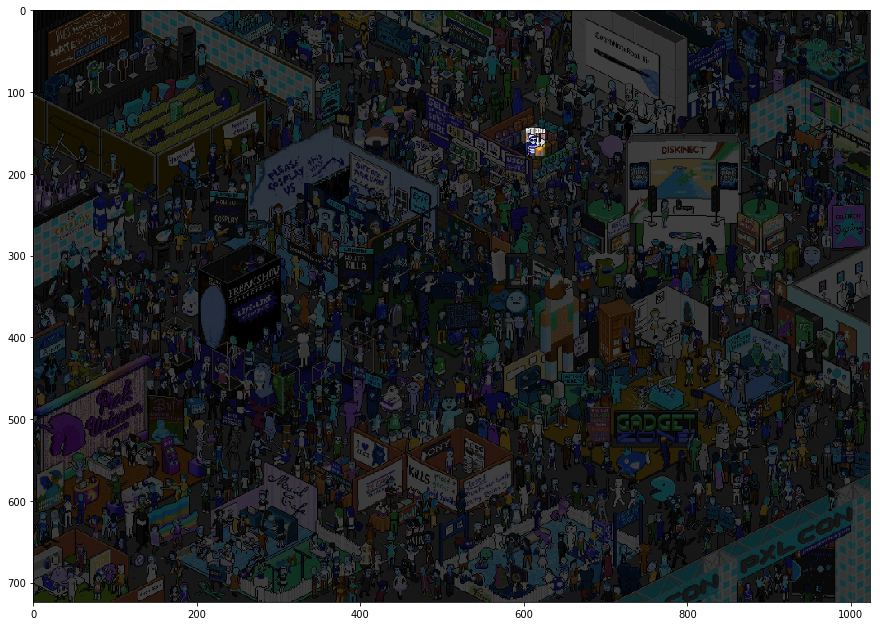

In [17]:
puzzle[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = waldo_location
# imwrite will make an image and save in current directory. 
cv2.imwrite("answer.jpg", puzzle)
result_rgb = cv2.cvtColor(puzzle,cv2.COLOR_RGB2BGR)
plt.figure(figsize=(15,15))
plt.imshow(result_rgb)